# Regresión lineal simple

En este archivo se implementa el algoritmo de **regresión lineal simple** para estimar la edad estelar mediante la característica 'Masa'.

In [98]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/Pruebas_regresion/gyro_tot_v20180801.txt', sep="\t", header=0)
df

,Seq,SIMBAD_ID,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,...,cutoff,class,type,cat1,cat2,e_M,e_R,e_Teff,e_L,mode
0,1,KIC10003270,1.416000,0.207466,0.103233,2.362000,0.114948,0.098478,6594,69,...,3.471749,MS,F,serenelli17,garcia14,10.970989,4.517914,1.046406,9.498159,Ast
1,2,KIC10016239,1.264000,0.054037,0.059641,1.298000,0.024698,0.025554,6482,51,...,3.545165,MS,F,serenelli17,garcia14,4.496741,1.935749,0.786794,8.232459,Ast
2,3,KIC10024648,1.444000,0.087693,0.137295,2.000000,0.050448,0.060208,6409,157,...,3.593017,MS,F,serenelli17,garcia14,7.790441,2.766399,2.449680,8.551756,Ast
3,4,KIC10025841,1.121000,0.133195,0.096649,1.521000,0.094557,0.085094,5738,187,...,4.032857,MS,G,serenelli17,garcia14,10.251748,5.905685,3.258975,8.542442,Ast
4,5,KIC10068307,1.608100,0.026300,0.026300,2.164600,0.013900,0.013900,6132,77,...,3.774590,MS,F,silva17,garcia14,1.635470,0.642151,1.255708,6.023016,Ast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,1460,KIC9837012,0.886374,0.022743,0.022743,0.777651,0.055476,0.055476,5579,183,...,4.137082,MS,G,mathur17,meibom11,2.565851,7.133751,3.432515,11.812753,Clust
1460,1461,KIC9838215,0.975155,0.022871,0.022871,0.919946,0.057136,0.057136,5776,138,...,4.007948,MS,G,mathur17,meibom11,2.345409,6.210840,2.683518,10.759006,Clust
1461,1462,KIC9896609,0.762092,0.022697,0.022697,0.650313,0.050160,0.050160,5024,151,...,4.500884,MS,K,mathur17,meibom11,2.978281,7.713252,2.856290,14.843708,Clust
1462,1463,KIC9896700,1.017446,0.022739,0.022739,0.982039,0.059040,0.059040,5889,142,...,3.933877,MS,G,mathur17,meibom11,2.234908,6.011960,2.708439,10.073298,Clust


In [99]:
# Control de nulos por cada columna del dataset
print(df.isnull().sum())

Seq             0
SIMBAD_ID       0
M               0
eM1             0
eM2             0
R               0
eR1             0
eR2             0
Teff            0
eTeff1          0
eTeff2          0
L              35
eL1            35
eL2            35
Meta            0
eMeta1          0
eMeta2          0
logg            0
elogg1          0
elogg2          0
rho          1158
erho1        1158
erho2        1158
Prot            0
eProt1          0
eProt2          0
Age             0
eAge1           0
eAge2           0
cutoff          0
class           0
type            0
cat1            0
cat2            0
e_M             0
e_R             0
e_Teff          0
e_L             0
mode            0
dtype: int64


In [100]:
# Se eliminan las filas con valores NULL/NA
df = df.dropna()
print(df.isnull().sum())

Seq          0
SIMBAD_ID    0
M            0
eM1          0
eM2          0
R            0
eR1          0
eR2          0
Teff         0
eTeff1       0
eTeff2       0
L            0
eL1          0
eL2          0
Meta         0
eMeta1       0
eMeta2       0
logg         0
elogg1       0
elogg2       0
rho          0
erho1        0
erho2        0
Prot         0
eProt1       0
eProt2       0
Age          0
eAge1        0
eAge2        0
cutoff       0
class        0
type         0
cat1         0
cat2         0
e_M          0
e_R          0
e_Teff       0
e_L          0
mode         0
dtype: int64


In [101]:
df_2 = df[['Seq', 'M', 'R', 'Teff','L','Meta','logg','Prot','Age']]
df_2

,Seq,M,R,Teff,L,Meta,logg,Prot,Age
0,1,1.4160,2.3620,6594,9.8470,-0.181,3.8480,7.090,2.4670
1,2,1.2640,1.2980,6482,2.5670,-0.005,4.3120,4.910,1.2890
2,3,1.4440,2.0000,6409,5.8750,-0.006,3.9940,10.580,2.3400
3,4,1.1210,1.5210,5738,3.1810,0.197,4.1270,11.840,7.2890
4,5,1.6081,2.1646,6132,6.6910,-0.230,3.9732,18.600,2.0082
...,...,...,...,...,...,...,...,...,...
307,308,1.2910,1.7750,6550,5.8370,-0.307,4.0480,10.340,2.8120
308,309,1.1680,2.0140,6074,5.2160,-0.314,3.8960,21.070,4.9240
309,310,1.6260,3.3990,5936,14.4300,-0.054,3.5880,15.650,1.7790
310,311,1.5300,2.7640,6000,9.8680,0.160,3.7390,17.295,2.4890


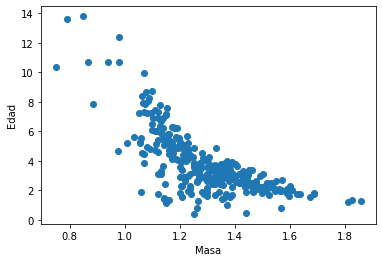

In [102]:
#Definición de las variables a emplear

Y = np.array(df_2['Age']) #Predecir Age
X = np.array(df_2[['M']]) #A través de la masa
#X = np.array(df[['Seq', 'M', 'R', 'Teff','L','Meta','logg','Prot']]) #A través de las demás columnas

#Diagrama de dispersión
plt.scatter(X,Y)
plt.xlabel('Masa')
plt.ylabel('Edad')
plt.show()

In [137]:
#Se separa el 20% de los datos para test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [104]:
#Definición del algoritmo
regr = linear_model.LinearRegression()

#Entrenamiento del algoritmo
regr.fit(X_train,Y_train)

LinearRegression()

In [105]:
#Realizar una predicción
Y_pred = regr.predict(X_test)

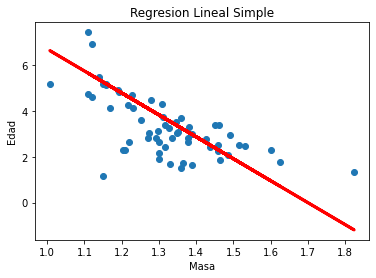

In [106]:
#Diagrama de dispersión
plt.scatter(X_test,Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresion Lineal Simple')
plt.xlabel('Masa')
plt.ylabel('Edad')
plt.show()

In [107]:
#Valores de pendiente e intersección

print('Valor de la pendiente:')
print(regr.coef_)
print('Valor de la intersección:')
print(regr.intercept_)

Valor de la pendiente:
[-9.58598866]
Valor de la intersección:
16.292142228227316


In [108]:
#Ecuación del modelo de regresión lineal simple

print('y = ', regr.coef_, 'x ', regr.intercept_)

y =  [-9.58598866] x  16.292142228227316


In [129]:
#Comparación de arrays

data = {'Y_test':  Y_test,
        'Y_pred': Y_pred,
        }

df_new = pd.DataFrame (data, columns = ['Y_test','Y_pred'])

print (df_new)

    Y_test    Y_pred
0   4.2620  4.625994
1   2.4890  1.625580
2   3.2730  3.581121
3   2.8080  3.082650
4   3.0110  2.967618
5   5.1390  5.181981
6   1.6740  3.552363
7   5.1740  5.191567
8   4.1410  4.491790
9   4.6000  5.555835
10  2.4350  2.517077
11  2.6490  4.597236
12  3.7350  3.734497
13  3.0410  3.360644
14  1.9000  3.830357
15  3.6080  4.300070
16  2.2610  2.315771
17  4.5000  4.022077
18  3.1000  3.351058
19  5.5000  5.364115
20  6.9200  5.546249
21  3.3000  3.063478
22  2.1810  3.839943
23  2.8000  4.117937
24  7.4400  5.651695
25  2.5240  2.315771
26  1.3160 -1.192701
27  2.8120  3.916631
28  2.6490  3.830357
29  3.0540  4.098765
30  2.2850  4.712268
31  5.2000  5.268255
32  2.4990  1.759783
33  2.6420  3.082650
34  3.4000  2.392459
35  3.4000  2.296599
36  4.9190  4.884816
37  2.4500  3.686567
38  2.0590  2.047363
39  5.1740  6.639052
40  2.2820  4.760198
41  3.1120  3.849529
42  4.2910  3.763255
43  1.7790  0.705325
44  3.3980  3.686567
45  4.8370  4.865644
46  4.7220  5

In [138]:
#Precisión del algoritmo (train)

print('Precisión del algoritmo: %.3f'
      % regr.score(X_train, Y_train))

Precisión del algoritmo: 0.537


In [139]:
#Precisión del algoritmo (test)

print('Precisión del algoritmo: %.3f'
      % regr.score(X_test, Y_test))

Precisión del algoritmo: 0.571


In [118]:
from sklearn.metrics import mean_squared_error, r2_score, max_error

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))
# The max error
print('Max error: %.2f'
      % max_error(Y_test, Y_pred))

Mean squared error: 1.40
Coefficient of determination: 0.20
Max error: 4.11


In [88]:
# Almacenar valor

lineal_simple = regr.score(X_test, Y_test)
%store lineal_simple

Stored 'lineal_simple' (float64)
